>The first and foremost step in clustering is to examine the data and determine what really needs to be clustered. This is the most important as well as a tedious step. The original Vancouver dataset contained a column stating different types of crime prevalent in Vancouver, along with the Neighbourhood where it took place, and the corresponding Longitude and Latitude.

>Since the data had a lot of qualitative data as well, it was not ideal to get good clustering results. Hence to counter that, the data was transformed such that we get the count of each crime type for each neighbourhood.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data Cleaning and Transformation



> Description: The data is the count of different types of crimes committed againts each corresponding neighbourhood, along with the respective Latitude and Longitude values



In [ ]:
#Upload the dataset file to your drive and then put it's entire path below
#You can get the Vancouver Crime Dataset from the following link: https://drive.google.com/file/d/1HkQqxdTbPgHO15OzqlWgyUFnrz5F_Mh3/view?usp=sharing

import pandas as pd
df=pd.read_csv('/content/drive/My Drive/Colab Notebooks Datasets/Neighbourhood Crime Data.csv')
df.head(df.shape[0])

,Neighbourhood,Break and Enter Commercial,Break and Enter Residential/Other,Mischief,Other Theft,Theft from Vehicle,Theft of Bicycle,Theft of Vehicle,Vehicle Collision or Pedestrian Struck (with Fatality),Vehicle Collision or Pedestrian Struck (with Injury),Grand Total,Lat-Long,X,Y
0,Arbutus Ridge,325,1672,934,337,1852,160,498,3,285,6066,"(49.25484525,-123.160674)",488319.9640,5454695.008
1,Central Business District,9371,3505,16672,19244,48003,6907,4016,41,3188,110947,"(49.2857901,-123.115764)",491566.1638,5458706.223
2,Dunbar-Southlands,294,1847,1324,241,2899,240,629,3,269,7746,"(49.25062249,-123.1852799)",486561.3973,5454681.789
3,Fairview,3303,3834,3196,3269,11934,3394,2037,14,1180,32161,"(49.26736012,-123.1292449)",490561.1254,5456813.337
4,Grandview-Woodland,2082,4515,4970,2508,7342,1403,3111,9,1240,27180,"(49.27475329,-123.0673365)",495098.3049,5458046.768
5,Hastings-Sunrise,929,3199,2904,1379,5654,321,2452,18,1270,18126,"(49.27633928,-123.0427116)",496899.7762,5458151.929
6,Kensington-Cedar Cottage,1277,4136,3760,2961,7474,859,2919,11,1544,24941,"(49.24632019,-123.0740992)",494719.1472,5455099.663
7,Kerrisdale,326,1826,1049,265,2805,179,547,7,443,7447,"(49.23550641,-123.1556061)",488392.0172,5452821.073
8,Killarney,302,2130,1761,245,3990,163,1302,12,570,10475,"(49.22129651,-123.0385735)",497319.8795,5451989.922
9,Kitsilano,2092,4390,3692,1730,8912,2464,2366,13,1040,26699,"(49.26597507,-123.16554)",488285.7883,5457107.754




> Creating a copy of the dataframe for later use



In [ ]:
dfc=df.copy()



> Using Descriptive Statistics to create a summary of all the features



In [ ]:
df.describe()

,Break and Enter Commercial,Break and Enter Residential/Other,Mischief,Other Theft,Theft from Vehicle,Theft of Bicycle,Theft of Vehicle,Vehicle Collision or Pedestrian Struck (with Fatality),Vehicle Collision or Pedestrian Struck (with Injury),Grand Total,X,Y
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.00000,24.000000,24.000000,24.000000,24.000000,24.000000,2.400000e+01
mean,1410.083333,2535.791667,2923.333333,2173.458333,7120.458333,1067.50000,1598.000000,10.583333,911.958333,19751.166667,491512.829921,5.455446e+06
std,1953.104016,1253.885057,3326.105330,3960.075164,9528.074649,1606.50022,1131.289683,8.459194,676.983301,22223.313483,3460.920135,2.677164e+03
min,17.000000,65.000000,104.000000,1.000000,217.000000,7.00000,40.000000,1.000000,59.000000,532.000000,485434.896400,5.450811e+06
25%,322.250000,1813.000000,922.750000,263.750000,2676.250000,177.25000,534.750000,5.500000,386.750000,7101.750000,489503.954825,5.453011e+06
50%,888.500000,2513.000000,1850.000000,876.500000,4210.000000,288.00000,1494.500000,9.500000,858.500000,12802.000000,491169.340900,5.454985e+06
75%,2084.500000,3486.250000,3791.500000,2621.250000,7710.500000,1112.00000,2502.500000,13.250000,1247.500000,26714.500000,493652.384325,5.457343e+06
max,9371.000000,4515.000000,16672.000000,19244.000000,48003.000000,6907.00000,4016.000000,41.000000,3188.000000,110947.000000,497319.879500,5.460896e+06


> **Normalization of data**: The range of mean and standard deviation feature varies between different features. Also the mean values of some of them significantly differs from others. This different range of data among features may bias the result in case of clustering algorithms, in our case Euclidean Distance to calculate distance between points. So we will first normalize them all between 0 and 1 using MinMaxScaling().





> Dropping the features that won't be included in clustering



In [ ]:
df = df.drop(['Grand Total','Lat-Long', 'X', 'Y'], axis = 1)
# dfc = dfc.drop(['Grand Total','Lat-Long', 'X', 'Y'], axis = 1)
df.columns

Index(['Neighbourhood', 'Break and Enter Commercial',
       'Break and Enter Residential/Other', 'Mischief', 'Other Theft',
       'Theft from Vehicle', 'Theft of Bicycle', 'Theft of Vehicle',
       'Vehicle Collision or Pedestrian Struck (with Fatality)',
       'Vehicle Collision or Pedestrian Struck (with Injury)'],
      dtype='object')

In [ ]:
# Normalization of features
from sklearn.preprocessing import MinMaxScaler
mx = MinMaxScaler()
df[['Break and Enter Commercial','Break and Enter Residential/Other','Mischief','Other Theft','Theft from Vehicle','Theft of Bicycle', 'Theft of Vehicle', 'Vehicle Collision or Pedestrian Struck (with Fatality)', 'Vehicle Collision or Pedestrian Struck (with Injury)']] = pd.DataFrame(mx.fit_transform(df.drop('Neighbourhood',axis=1)))

In [ ]:
# Data after Normalization
df.head()

,Neighbourhood,Break and Enter Commercial,Break and Enter Residential/Other,Mischief,Other Theft,Theft from Vehicle,Theft of Bicycle,Theft of Vehicle,Vehicle Collision or Pedestrian Struck (with Fatality),Vehicle Collision or Pedestrian Struck (with Injury)
0,Arbutus Ridge,0.032927,0.361124,0.050097,0.017461,0.034215,0.022174,0.115191,0.050,0.072228
1,Central Business District,1.000000,0.773034,1.000000,1.000000,1.000000,1.000000,1.000000,1.000,1.000000
2,Dunbar-Southlands,0.029613,0.400449,0.073636,0.012472,0.056125,0.033768,0.148139,0.050,0.067114
3,Fairview,0.351294,0.846966,0.186625,0.169828,0.245197,0.490870,0.502264,0.325,0.358261
4,Grandview-Woodland,0.220761,1.000000,0.293699,0.130281,0.149102,0.202319,0.772384,0.200,0.377437


## Determining the right number of clusters

> We don't know the number of clusters beforehand and neither can we assume them. We will determine it in case of KMeans Clustering algorithm using **Elbow Method**. This is called Elbow Method because we will choose the cluster at that point of the graph from where it stops falling steeply (just like an elbow of hand). It is the point where the WCSS(Within Cluster Sum of Squares) decreases very slowly. 

> WCSS is the distance between points in a cluster.





[10.858338468230103, 5.46074289950369, 1.8623573622748446, 1.1775174711456946, 0.9169325230485207, 0.677786385170947, 0.44561117168636905, 0.35503266899937647, 0.28020223224417107]


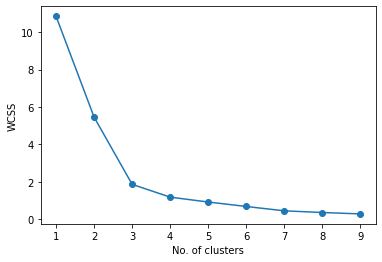

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
wcss=[]
for i in range(1,10):
  kmeans=KMeans(i,random_state=3)
  kmeans.fit(df.drop('Neighbourhood',axis=1))
  wcss.append(kmeans.inertia_)
plt.plot(range(1,10),wcss,'-o')
plt.xlabel('No. of clusters')
plt.ylabel('WCSS')
print(wcss)

> From WCSS values and the above shown Plot we can see that 3 or 4 can be the ideal number of clusters.

> We will use some metric to choose the ideal number of clusters to remove any confusion





>We can use suitable metrics to decide exact number of cluster between 3 and 4. The metrics we will use are:

>1. Silhoutte Score- It ranges from -1 to 1. Higher the value better our clusters are. Closer to 1 means perfect clusters. 0 mean the point lies at the border of it's cluster. Negative value means that the point is classified into wrong cluster.

>2. Calinski-Harabasz Index denotes how the data points are spread within a cluster. Higher the score, denser is the cluster thus the cluster is better. It starts from 0 and have no upper limit.

>3. Davies Boulden Index measures the average similarity between cluster using the ratio of the distance between a cluster and it's closest point & the average distance between each data point of a cluster and it's cluster center.Closer the score is to 0, better our clusters are as it indicates clusters are well separated.


In [ ]:
# Importing the metric libraries
from sklearn.metrics import silhouette_score,calinski_harabasz_score,davies_bouldin_score

## K-Means Clustering

In [ ]:
# Running the Clustering algo through different number of clusters
l1 = []
l2 = []
l3 = []
l4 = []

for i in (3,4,5):
  kmean = KMeans(i,random_state=42)
  mod_k = kmean.fit(df.drop('Neighbourhood',axis=1))
  pred_k1 = mod_k.predict(df.drop('Neighbourhood',axis=1))
  kmean_sil = silhouette_score(df.drop('Neighbourhood',axis=1),pred_k1,metric='euclidean')
  kmean_cal = calinski_harabasz_score(df.drop('Neighbourhood',axis=1),pred_k1)
  kmean_dav = davies_bouldin_score(df.drop('Neighbourhood',axis=1),pred_k1)
  print(i,'\t','Silhouette Score:' ,kmean_sil,',Calinski Harbasz Score: ',kmean_cal,',Davies Bouldin Score: ',kmean_dav)
  l1.append(kmean_sil)
  l2.append(kmean_cal)
  l3.append(kmean_dav)
  l4.append(i)

3 	 Silhouette Score: 0.5101578969232564 ,Calinski Harbasz Score:  50.71948248275578 ,Davies Bouldin Score:  0.4973888249838292
4 	 Silhouette Score: 0.4199446848843322 ,Calinski Harbasz Score:  54.809213645411795 ,Davies Bouldin Score:  0.6504019952413668
5 	 Silhouette Score: 0.40124402237409024 ,Calinski Harbasz Score:  51.499621894329636 ,Davies Bouldin Score:  0.6423543070999966


In [ ]:
pd.DataFrame({'Cluster_number':l4,'Silhoutte Score':l1,'Calinski Harabasz Index':l2,'Davies Bouldin Score':l3})

,Cluster_number,Silhoutte Score,Calinski Harabasz Index,Davies Bouldin Score
0,3,0.510158,50.719482,0.497389
1,4,0.419945,54.809214,0.650402
2,5,0.401244,51.499622,0.642354


>As expected from screeplot, 3 has best SilHouette Score and Davies Bouldin Score and second best Calinski Harabasz Score. So 3 number of clusters can be an ideal choice.

>Let's try performing KMeans Clustering on unnormalized data and check what's happening

In [ ]:
l1 = []
l2 = []
l3 = []
l4 = []
for i in (3,4,5):
  kmean = KMeans(i,random_state=42)
  mod_k = kmean.fit(dfc.drop(['Neighbourhood', 'Grand Total', 'Lat-Long', 'X', 'Y'], axis=1))
  pred_k2 = mod_k.predict(dfc.drop(['Neighbourhood', 'Grand Total', 'Lat-Long', 'X', 'Y'],axis=1))
  kmean_sil = silhouette_score(dfc.drop(['Neighbourhood', 'Grand Total', 'Lat-Long', 'X', 'Y'],axis=1),pred_k2,metric='euclidean')
  kmean_cal = calinski_harabasz_score(dfc.drop(['Neighbourhood', 'Grand Total', 'Lat-Long', 'X', 'Y'],axis=1),pred_k2)
  kmean_dav = davies_bouldin_score(dfc.drop(['Neighbourhood', 'Grand Total', 'Lat-Long', 'X', 'Y'],axis=1),pred_k2)
  print(i,'\t','Silhouette Score:' ,kmean_sil,',Calinski Harbasz Score: ',kmean_cal,',Davies Bouldin Score: ',kmean_dav)
  l1.append(kmean_sil)
  l2.append(kmean_cal)
  l3.append(kmean_dav)
  l4.append(i)

3 	 Silhouette Score: 0.5615182129112963 ,Calinski Harbasz Score:  157.57430018530758 ,Davies Bouldin Score:  0.42432829374013403
4 	 Silhouette Score: 0.5160667085721896 ,Calinski Harbasz Score:  186.90626281341093 ,Davies Bouldin Score:  0.5087516348784258
5 	 Silhouette Score: 0.4139555712232837 ,Calinski Harbasz Score:  201.4172293533278 ,Davies Bouldin Score:  0.45354564662039315


In [ ]:
pd.DataFrame({'Cluster_number':l4,'Silhoutte Score':l1,'Calinski Harabasz Index':l2,'Davies Bouldin Score':l3})

,Cluster_number,Silhoutte Score,Calinski Harabasz Index,Davies Bouldin Score
0,3,0.561518,157.574300,0.424328
1,4,0.516067,186.906263,0.508752
2,5,0.413956,201.417229,0.453546


>We can see that best cluster no. in this case as well is 3.

## Hierarchical Clustering

> **Hierarchical Clustering** : Next algorithm that can be used is a Hierarchical Clustering technique called Agglomerative Clustering. It is a bottom-up clustering approach.

>The Heirarchical Clustering can be visualized using a dendrogram.

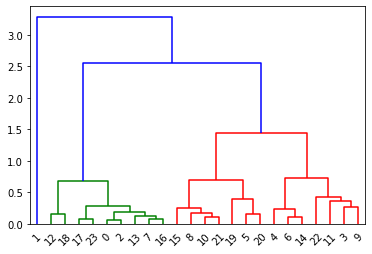

In [ ]:
from scipy.cluster.hierarchy import dendrogram
import scipy.cluster.hierarchy as sch
dendrogram=sch.dendrogram(sch.linkage(df.drop('Neighbourhood',axis=1),method='ward'))

>From the dendrogram we can see that the ideal number of clusters for the dataset is 3, the kmeans algorithm also gave the same result. We will again use Silhoutte Score, Calinski Harabarz Index and Davis Bouldin Score to validate this.

In [ ]:
list1 = ['single','complete','average','ward']

In [ ]:
from sklearn.cluster import AgglomerativeClustering
l1=[]
l2=[]
l3=[]
l4=[]
l5=[]
for j in list1:
  for i in (3,4,5):
    agg_m=AgglomerativeClustering(n_clusters=i,affinity='euclidean',linkage=j)
    mod_k=agg_m.fit(df.drop('Neighbourhood',axis=1))
    #pred_k=mod_k.predict(df.drop('Neighbourhood',axis=1))
    kmean_sil=silhouette_score(df.drop('Neighbourhood',axis=1),agg_m.labels_,metric='euclidean')
    kmean_cal=calinski_harabasz_score(df.drop('Neighbourhood',axis=1),agg_m.labels_)
    kmean_dav=davies_bouldin_score(df.drop('Neighbourhood',axis=1),agg_m.labels_)
    print(i,j)
    print(i,'\t','Silhouette Score:' ,kmean_sil,',Calinski Harbasz Score: ',kmean_cal,',Davies Bouldin Score: ',kmean_dav)
    print('---------')
    print('\n')
    l1.append(i)
    l2.append(j)
    l3.append(kmean_sil)
    l4.append(kmean_cal)
    l5.append(kmean_dav)

3 single
3 	 Silhouette Score: 0.15182073904872628 ,Calinski Harbasz Score:  12.284775523056982 ,Davies Bouldin Score:  0.4821728846396103
---------


4 single
4 	 Silhouette Score: 0.336031698455353 ,Calinski Harbasz Score:  26.180056810838533 ,Davies Bouldin Score:  0.5313875647130155
---------


5 single
5 	 Silhouette Score: 0.31237672242816816 ,Calinski Harbasz Score:  19.70696358811715 ,Davies Bouldin Score:  0.5299927742053796
---------


3 complete
3 	 Silhouette Score: 0.433712851892372 ,Calinski Harbasz Score:  40.75031033481905 ,Davies Bouldin Score:  0.512536005630173
---------


4 complete
4 	 Silhouette Score: 0.4199446848843322 ,Calinski Harbasz Score:  54.80921364541179 ,Davies Bouldin Score:  0.6504019952413668
---------


5 complete
5 	 Silhouette Score: 0.40124402237409024 ,Calinski Harbasz Score:  51.49962189432964 ,Davies Bouldin Score:  0.6423543070999966
---------


3 average
3 	 Silhouette Score: 0.5101578969232564 ,Calinski Harbasz Score:  50.71948248275578 ,Da

In [ ]:
pd.DataFrame({'Cluster':l1,'Linkage':l2,'Silhoutte Score':l3,'Calinski Harabasz Index':l4,'Davies Bouldin Score':l5})

,Cluster,Linkage,Silhoutte Score,Calinski Harabasz Index,Davies Bouldin Score
0,3,single,0.151821,12.284776,0.482173
1,4,single,0.336032,26.180057,0.531388
2,5,single,0.312377,19.706964,0.529993
3,3,complete,0.433713,40.750310,0.512536
4,4,complete,0.419945,54.809214,0.650402
5,5,complete,0.401244,51.499622,0.642354
6,3,average,0.510158,50.719482,0.497389
7,4,average,0.391560,45.086834,0.631270
8,5,average,0.358365,47.250805,0.606824
9,3,ward,0.433713,40.750310,0.512536


>As observed from the output, ideal number of clusters is indeed 3 with linkage method '**average**'.

In [ ]:
# Using the algorithm on Unnormalized data
l1=[]
l2=[]
l3=[]
l4=[]
l5=[]
for j in list1:
 for i in (3,4,5):
  agm=AgglomerativeClustering(n_clusters=i,affinity='euclidean',linkage=j)
  mod_k=agm.fit(dfc.drop(['Neighbourhood', 'Grand Total', 'Lat-Long', 'X', 'Y'],axis=1))
  #pred_k=mod_k.predict(df.drop('Neighbourhood',axis=1))
  kmean_sil=silhouette_score(dfc.drop(['Neighbourhood', 'Grand Total', 'Lat-Long', 'X', 'Y'],axis=1),agm.labels_,metric='euclidean')
  kmean_cal=calinski_harabasz_score(dfc.drop(['Neighbourhood', 'Grand Total', 'Lat-Long', 'X', 'Y'],axis=1),agm.labels_)
  kmean_dav=davies_bouldin_score(dfc.drop(['Neighbourhood', 'Grand Total', 'Lat-Long', 'X', 'Y'],axis=1),agm.labels_)
  print(i,j)
  print(i,'\t','Silhouette Score:' ,kmean_sil,',Calinski Harbasz Score: ',kmean_cal,',Davies Bouldin Score: ',kmean_dav)
  print('---------')
  print('\n')
  l1.append(i)
  l2.append(j)
  l3.append(kmean_sil)
  l4.append(kmean_cal)
  l5.append(kmean_dav)

3 single
3 	 Silhouette Score: 0.5235497748252753 ,Calinski Harbasz Score:  69.31360121473055 ,Davies Bouldin Score:  0.20622632719201972
---------


4 single
4 	 Silhouette Score: 0.040045734076529164 ,Calinski Harbasz Score:  45.99714706050404 ,Davies Bouldin Score:  0.5617833083417635
---------


5 single
5 	 Silhouette Score: 0.34899554594344107 ,Calinski Harbasz Score:  133.91264422727926 ,Davies Bouldin Score:  0.40500345884332106
---------


3 complete
3 	 Silhouette Score: 0.5615182129112963 ,Calinski Harbasz Score:  157.57430018530758 ,Davies Bouldin Score:  0.42432829374013403
---------


4 complete
4 	 Silhouette Score: 0.5269127758449531 ,Calinski Harbasz Score:  168.06960724175372 ,Davies Bouldin Score:  0.3573408246604552
---------


5 complete
5 	 Silhouette Score: 0.4139555712232837 ,Calinski Harbasz Score:  201.41722935332783 ,Davies Bouldin Score:  0.45354564662039315
---------


3 average
3 	 Silhouette Score: 0.5235497748252753 ,Calinski Harbasz Score:  69.313601214

In [ ]:
pd.DataFrame({'Cluster':l1,'Linkage':l2,'Silhoutte Score':l3,'Calinski Harabasz Index':l4,'Davies Bouldin Score':l5})

,Cluster,Linkage,Silhoutte Score,Calinski Harabasz Index,Davies Bouldin Score
0,3,single,0.523550,69.313601,0.206226
1,4,single,0.040046,45.997147,0.561783
2,5,single,0.348996,133.912644,0.405003
3,3,complete,0.561518,157.574300,0.424328
4,4,complete,0.526913,168.069607,0.357341
5,5,complete,0.413956,201.417229,0.453546
6,3,average,0.523550,69.313601,0.206226
7,4,average,0.526913,168.069607,0.357341
8,5,average,0.446650,143.892703,0.353426
9,3,ward,0.536426,146.791823,0.426611


>In case of unnormalized dataset, **3** as the number of clusters with **complete** and **averga** linkage are giving comparable resultss.

## Fuzzy C-Means Clustering

In [ ]:
!pip install fuzzy-c-means

In [ ]:
# Importing the relevant libraries
# %matplotlib inline
import numpy as np
from fcmeans import FCM
from matplotlib import pyplot as plt

In [ ]:
# Determining the clustering accuracy for different number of clusters
X = df.iloc[:,1:10].values

n_clusters_list = [2, 3, 4, 5, 6, 7]
models = list()
for n_clusters in n_clusters_list:
    fcm = FCM(n_clusters)
    abc = fcm.fit(X)
    models.append(fcm)

>Fuzzy logic principles can be used to cluster multidimensional data, assigning each point a membership in each cluster center from 0 to 100 percent. This can be very powerful compared to traditional hard-thresholded clustering where every point is assigned a crisp, exact label.

>A metric used to determine the right number of clusters in case of Fuzzy c-means is **FPC: Fuzzy Partition Coefficient**. The FPC is defined on the range from 0 to 1, with 1 being best. It is a metric which tells us how cleanly our data is described by a certain model. Next we will cluster our set of data - which we till now know has three clusters - several times, with between 2 and 5 clusters. We will then show the results of the clustering, and plot the fuzzy partition coefficient. When the FPC is maximized, our data is described best. Another similar metric is FPEC, which when is minimized, will describe our data the best.

Text(0, 0.5, 'Fuzzy partition coefficient')

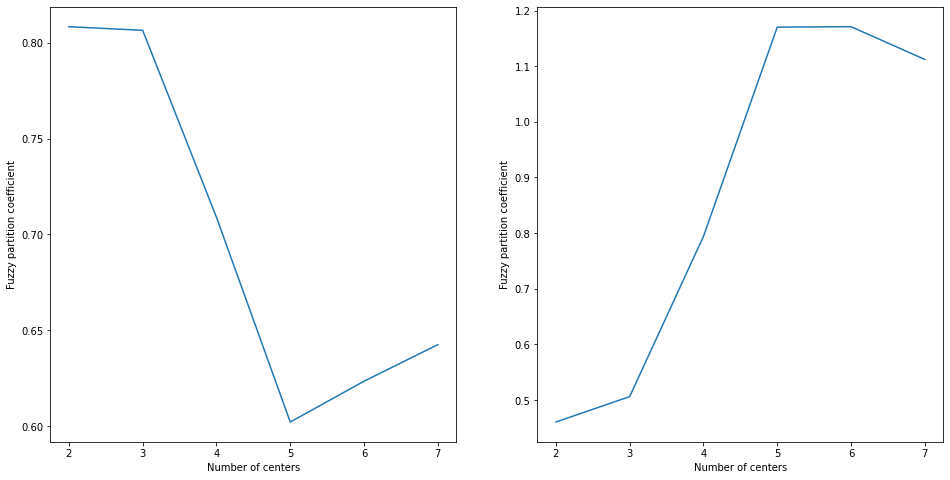

In [ ]:
# num_clusters = len(n_clusters_list)
# f, axes = plt.subplots(3, 2, figsize=(11,16))
# for n_clusters, model, axe in zip(n_clusters_list, models, axes.ravel()):
#     # get validation metrics
#     pc = model.partition_coefficient
#     pec = model.partition_entropy_coefficient
    
#     fcm_centers = model.centers
#     fcm_labels = model.predict(X)
#     # plot result
#     axe.scatter(X[:,0], X[:,1], c=fcm_labels, alpha=.1)
#     axe.scatter(fcm_centers[:,0], fcm_centers[:,1], marker="+", s=500, c='black')
#     axe.set_title(f'n_clusters = {n_clusters}, PC = {pc:.3f}, PEC = {pec:.3f}')
# plt.show()


FPC = []
FPEC = []
for model in models:
  FPC.append(model.partition_coefficient)
  FPEC.append(model.partition_entropy_coefficient)

fig2, ax2 = plt.subplots(1, 2, figsize = (16,8))
ax2[0].plot(n_clusters_list, FPC)
ax2[1].plot(n_clusters_list, FPEC)
ax2[0].set_xlabel("Number of centers")
ax2[0].set_ylabel("Fuzzy partition coefficient")
ax2[1].set_xlabel("Number of centers")
ax2[1].set_ylabel("Fuzzy partition coefficient")

>Since Fuzzy algorithm works differently, it is giving 2 and 3 both as the right number of clusters. Right now it will be suggested to proceed with the number 3 keeping other algos in mind. The reason why 2 is being given by the fuzzy as the right number of clusters is because the the third cluster has very few values (probably just one) as compared to the other two clusters. Since clustering the entire dataset into just two clusters will not give a significant distinction between different data points, it will recommended to proceed with 3 as the number of clusters. 

In [ ]:
l1 = []
l2 = []
l3 = []
l4 = []
X = df.iloc[:,1:10].values

for i in (2,3,4,5):
  fcm = FCM(i)
  mod_k = fcm.fit(X)
  fcm_k1 = fcm.predict(X)
  fcm_sil = silhouette_score(X,fcm_k1,metric='euclidean')
  fcm_cal = calinski_harabasz_score(X,fcm_k1)
  fcm_dav = davies_bouldin_score(X,fcm_k1)
  print(i,'\t','Silhouette Score:' ,fcm_sil,',Calinski Harbasz Score: ',fcm_cal,',Davies Bouldin Score: ',fcm_dav)
  l1.append(fcm_sil)
  l2.append(fcm_cal)
  l3.append(fcm_dav)
  l4.append(i)

2 	 Silhouette Score: 0.4785404763724821 ,Calinski Harbasz Score:  20.18174641078488 ,Davies Bouldin Score:  0.7663325161242579
3 	 Silhouette Score: 0.5101578969232564 ,Calinski Harbasz Score:  50.71948248275577 ,Davies Bouldin Score:  0.4973888249838292
4 	 Silhouette Score: 0.4199446848843322 ,Calinski Harbasz Score:  54.809213645411795 ,Davies Bouldin Score:  0.6504019952413667
5 	 Silhouette Score: 0.31398419066385935 ,Calinski Harbasz Score:  10.788771718292452 ,Davies Bouldin Score:  0.9729776767684942


In [ ]:
pd.DataFrame({'Cluster_number':l4, 'Silhouette Score':l1, 'Calinski Harbasz Score':l2, 'Davies Bouldin Score':l3})

,Cluster_number,Silhouette Score,Calinski Harbasz Score,Davies Bouldin Score
0,2,0.478540,20.181746,0.766333
1,3,0.510158,50.719482,0.497389
2,4,0.419945,54.809214,0.650402
3,5,0.313984,10.788772,0.972978


>With the help of the above calculated three metrics, we can see that Silhouette Score and Davies Bouldin Score are the best for 3 as the number of clusters, and Calinski Harbasz Score is the second best. That helps us proceed with 3 as the right number of clusters.

In [ ]:
dfc.columns

Index(['Neighbourhood', 'Break and Enter Commercial',
       'Break and Enter Residential/Other', 'Mischief', 'Other Theft',
       'Theft from Vehicle', 'Theft of Bicycle', 'Theft of Vehicle',
       'Vehicle Collision or Pedestrian Struck (with Fatality)',
       'Vehicle Collision or Pedestrian Struck (with Injury)', 'Grand Total',
       'Lat-Long', 'X', 'Y'],
      dtype='object')

In [ ]:
# Let's try performing Fuzzy C-means Clustering on unnormalized data and check what's happening
l1 = []
l2 = []
l3 = []
l4 = []

X = df.iloc[:,1:10].values

for i in (2,3,4,5):
  fcm = FCM(i)
  mod_k = fcm.fit(X)
  fcm_k2 = fcm.predict(X)
  fcm_sil = silhouette_score(X,fcm_k2,metric='euclidean')
  fcm_cal = calinski_harabasz_score(X,fcm_k2)
  fcm_dav = davies_bouldin_score(X,fcm_k2)
  print(i,'\t','Silhouette Score:' ,fcm_sil,',Calinski Harbasz Score: ',fcm_cal,',Davies Bouldin Score: ',fcm_dav)
  l1.append(fcm_sil)
  l2.append(fcm_cal)
  l3.append(fcm_dav)
  l4.append(i)

2 	 Silhouette Score: 0.4785404763724821 ,Calinski Harbasz Score:  20.18174641078488 ,Davies Bouldin Score:  0.7663325161242579
3 	 Silhouette Score: 0.5101578969232564 ,Calinski Harbasz Score:  50.71948248275577 ,Davies Bouldin Score:  0.4973888249838292
4 	 Silhouette Score: 0.4199446848843322 ,Calinski Harbasz Score:  54.809213645411795 ,Davies Bouldin Score:  0.6504019952413667
5 	 Silhouette Score: 0.31398419066385935 ,Calinski Harbasz Score:  10.788771718292452 ,Davies Bouldin Score:  0.9729776767684942


In [ ]:
pd.DataFrame({'Cluster_number':l4, 'Silhouette Score':l1, 'Calinski Harbasz Score':l2, 'Davies Bouldin Score':l3})

,Cluster_number,Silhouette Score,Calinski Harbasz Score,Davies Bouldin Score
0,2,0.478540,20.181746,0.766333
1,3,0.510158,50.719482,0.497389
2,4,0.419945,54.809214,0.650402
3,5,0.313984,10.788772,0.972978


>With the help of the above calculated three metrics, we can see that Silhouette Score and Davies Bouldin Score are the best for 3 as the number of clusters, and Calinski Harbasz Score is the second best. That helps us proceed with 3 as the right number of clusters, in case we choose to have unnormalized data as our underlying dataset.

## Applying the Algorithms and Visualizing them

In [ ]:
kmeansf = KMeans(n_clusters = 3,random_state = 31)
kmeansf.fit(df.drop(['Neighbourhood'],axis = 1))
pred_kmeans = kmeansf.predict(df.drop(['Neighbourhood'],axis=1))
df['pred_kmeans'] = pred_kmeans

In [ ]:
df.head()

,Neighbourhood,Break and Enter Commercial,Break and Enter Residential/Other,Mischief,Other Theft,Theft from Vehicle,Theft of Bicycle,Theft of Vehicle,Vehicle Collision or Pedestrian Struck (with Fatality),Vehicle Collision or Pedestrian Struck (with Injury),pred_kmeans
0,Arbutus Ridge,0.032927,0.361124,0.050097,0.017461,0.034215,0.022174,0.115191,0.050,0.072228,0
1,Central Business District,1.000000,0.773034,1.000000,1.000000,1.000000,1.000000,1.000000,1.000,1.000000,2
2,Dunbar-Southlands,0.029613,0.400449,0.073636,0.012472,0.056125,0.033768,0.148139,0.050,0.067114,0
3,Fairview,0.351294,0.846966,0.186625,0.169828,0.245197,0.490870,0.502264,0.325,0.358261,1
4,Grandview-Woodland,0.220761,1.000000,0.293699,0.130281,0.149102,0.202319,0.772384,0.200,0.377437,1


>We will be pivoting the resulting dataset after k-means clustering to help us visualize it later using a box-plot.

In [ ]:
df_k = pd.melt(frame=df.drop('Neighbourhood',axis=1),id_vars='pred_kmeans',var_name='parameters',value_name='values')
df_k.head()

,pred_kmeans,parameters,values
0,0,Break and Enter Commercial,0.032927
1,2,Break and Enter Commercial,1.000000
2,0,Break and Enter Commercial,0.029613
3,1,Break and Enter Commercial,0.351294
4,1,Break and Enter Commercial,0.220761


>The below shown is a Seaborn Boxplot that is a plot of values for each type of crime against its cluster

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


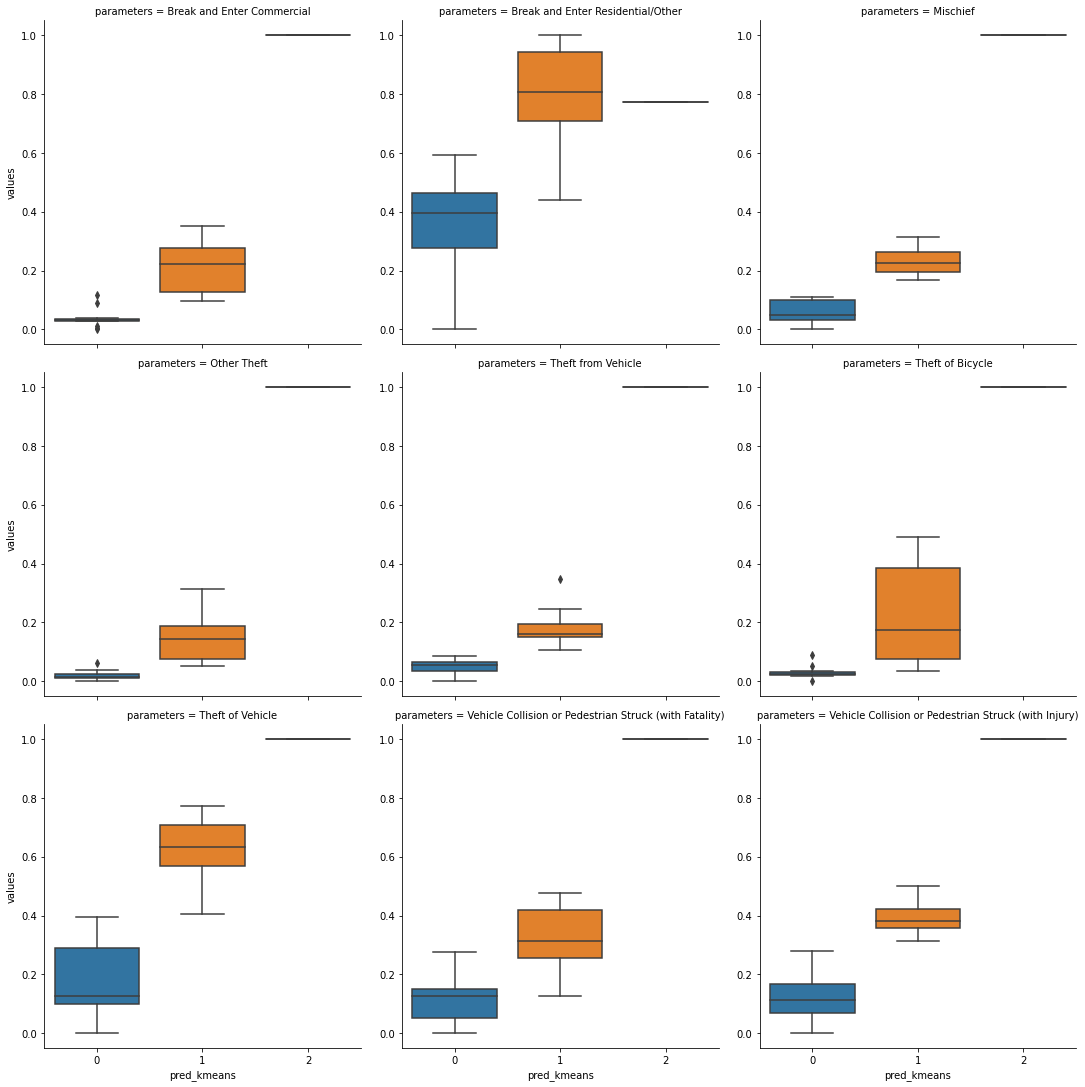

In [ ]:
import seaborn as sns 
sns.factorplot(data = df_k, y = 'values', x = 'pred_kmeans',col = 'parameters', kind = 'box',sharey = False, col_wrap = 3)

In [ ]:
agg_mod_ = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
agg_mod_.fit(df.drop('Neighbourhood', axis=1))
df['pred_agg']=agg_mod_.labels_

In [ ]:
df2 = pd.melt(frame=df.drop(['Neighbourhood','pred_kmeans'],axis=1),id_vars='pred_agg',var_name='parameters',value_name='values')
df2.head()

,pred_agg,parameters,values
0,1,Break and Enter Commercial,0.032927
1,2,Break and Enter Commercial,1.000000
2,1,Break and Enter Commercial,0.029613
3,0,Break and Enter Commercial,0.351294
4,0,Break and Enter Commercial,0.220761


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


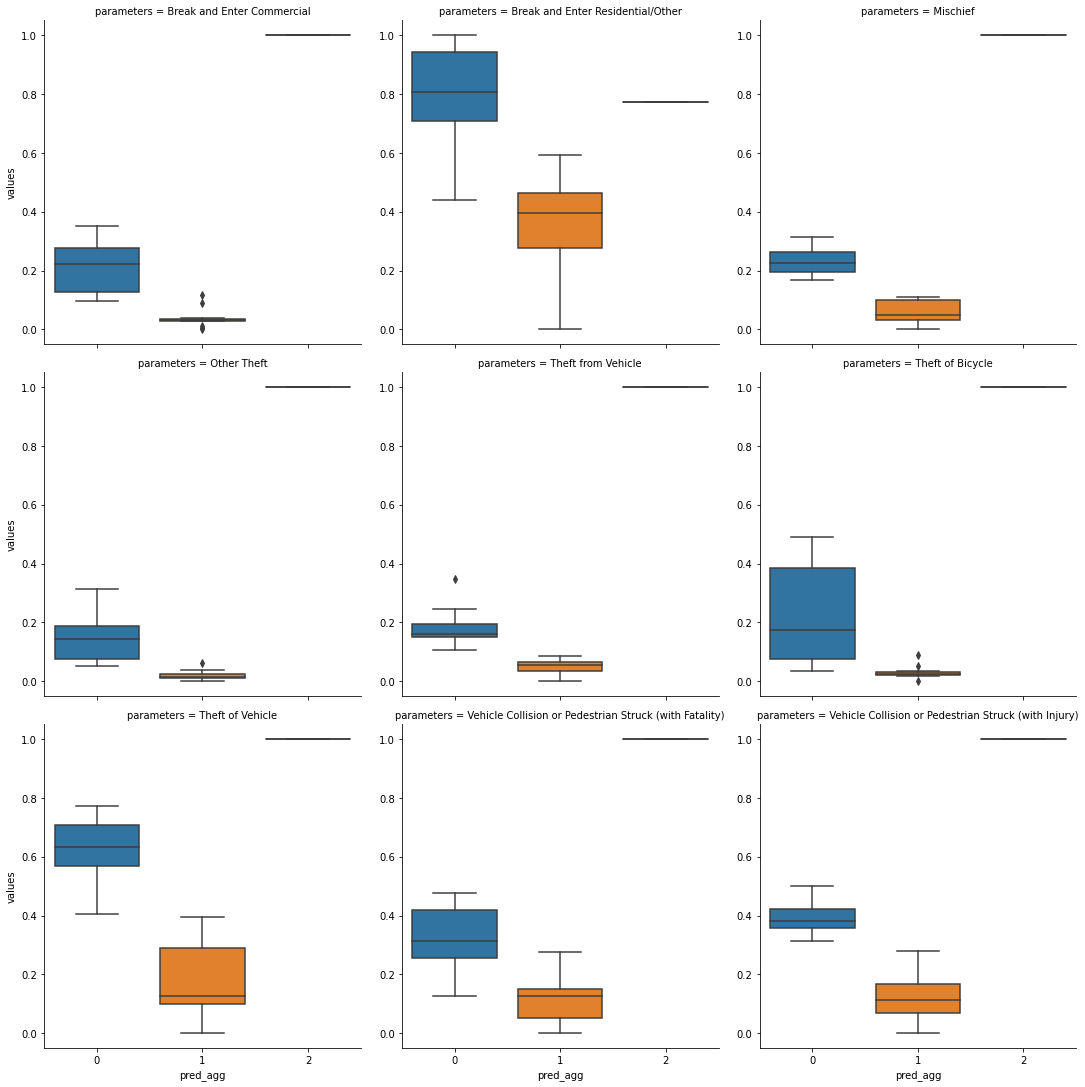

In [ ]:
sns.factorplot(data=df2,y='values',x='pred_agg',col='parameters',kind='box',sharey=False, col_wrap = 3)

In [ ]:
X = df.iloc[:, [1,10]].values

fcmf = FCM(3)
fcmf.fit(X)
pred_fcm = fcmf.predict(X)
df['pred_fcm'] = pred_fcm

In [ ]:
df.head()

,Neighbourhood,Break and Enter Commercial,Break and Enter Residential/Other,Mischief,Other Theft,Theft from Vehicle,Theft of Bicycle,Theft of Vehicle,Vehicle Collision or Pedestrian Struck (with Fatality),Vehicle Collision or Pedestrian Struck (with Injury),pred_kmeans,pred_agg,pred_fcm
0,Arbutus Ridge,0.032927,0.361124,0.050097,0.017461,0.034215,0.022174,0.115191,0.050,0.072228,0,1,0
1,Central Business District,1.000000,0.773034,1.000000,1.000000,1.000000,1.000000,1.000000,1.000,1.000000,2,2,2
2,Dunbar-Southlands,0.029613,0.400449,0.073636,0.012472,0.056125,0.033768,0.148139,0.050,0.067114,0,1,0
3,Fairview,0.351294,0.846966,0.186625,0.169828,0.245197,0.490870,0.502264,0.325,0.358261,1,0,1
4,Grandview-Woodland,0.220761,1.000000,0.293699,0.130281,0.149102,0.202319,0.772384,0.200,0.377437,1,0,1


In [ ]:
df3 = pd.melt(frame=df.drop(['Neighbourhood', 'pred_kmeans', 'pred_agg'],axis=1),id_vars='pred_fcm',var_name='parameters',value_name='values')
df3.head()

,pred_fcm,parameters,values
0,0,Break and Enter Commercial,0.032927
1,2,Break and Enter Commercial,1.000000
2,0,Break and Enter Commercial,0.029613
3,1,Break and Enter Commercial,0.351294
4,1,Break and Enter Commercial,0.220761


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


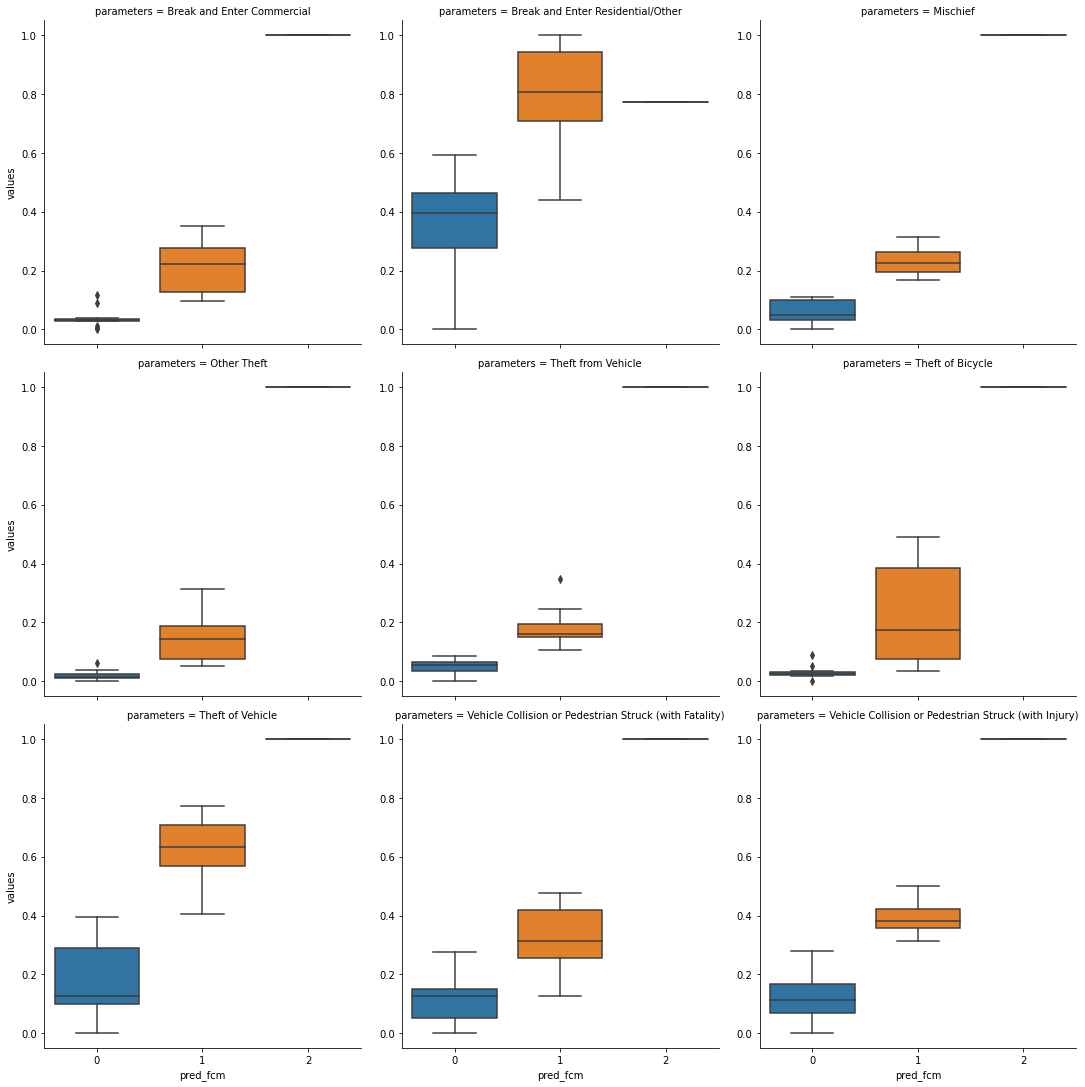

In [ ]:
sns.factorplot(data = df3, y = 'values', x = 'pred_fcm', col = 'parameters', kind = 'box', sharey = False, col_wrap = 3)

>We see that all the algorithms, KMeans Clustering, Agglomerative Clustering and Fuzzy C-means have exactly the same value range for  each of the feature/category, suggesting that the clustering happened perfectly and as expected.

>Upon observating the boxplots we can conclude that one cluster contains values with higher crime rate followed by moderate and low crime rate respectively for other clusters

## Map - Visualization

In [ ]:
df['Lat-Long'] = dfc['Lat-Long']
df.head()

,Neighbourhood,Break and Enter Commercial,Break and Enter Residential/Other,Mischief,Other Theft,Theft from Vehicle,Theft of Bicycle,Theft of Vehicle,Vehicle Collision or Pedestrian Struck (with Fatality),Vehicle Collision or Pedestrian Struck (with Injury),pred_kmeans,pred_agg,pred_fcm,Lat-Long
0,Arbutus Ridge,0.032927,0.361124,0.050097,0.017461,0.034215,0.022174,0.115191,0.050,0.072228,0,1,0,"(49.25484525,-123.160674)"
1,Central Business District,1.000000,0.773034,1.000000,1.000000,1.000000,1.000000,1.000000,1.000,1.000000,2,2,2,"(49.2857901,-123.115764)"
2,Dunbar-Southlands,0.029613,0.400449,0.073636,0.012472,0.056125,0.033768,0.148139,0.050,0.067114,0,1,0,"(49.25062249,-123.1852799)"
3,Fairview,0.351294,0.846966,0.186625,0.169828,0.245197,0.490870,0.502264,0.325,0.358261,1,0,1,"(49.26736012,-123.1292449)"
4,Grandview-Woodland,0.220761,1.000000,0.293699,0.130281,0.149102,0.202319,0.772384,0.200,0.377437,1,0,1,"(49.27475329,-123.0673365)"


In [ ]:
df[df['pred_kmeans']==0]

,Neighbourhood,Break and Enter Commercial,Break and Enter Residential/Other,Mischief,Other Theft,Theft from Vehicle,Theft of Bicycle,Theft of Vehicle,Vehicle Collision or Pedestrian Struck (with Fatality),Vehicle Collision or Pedestrian Struck (with Injury),pred_kmeans,pred_agg,pred_fcm,Lat-Long
0,Arbutus Ridge,0.032927,0.361124,0.050097,0.017461,0.034215,0.022174,0.115191,0.050,0.072228,0,1,0,"(49.25484525,-123.160674)"
2,Dunbar-Southlands,0.029613,0.400449,0.073636,0.012472,0.056125,0.033768,0.148139,0.050,0.067114,0,1,0,"(49.25062249,-123.1852799)"
7,Kerrisdale,0.033034,0.395730,0.057038,0.013719,0.054158,0.024928,0.127515,0.150,0.122723,0,1,0,"(49.23550641,-123.1556061)"
8,Killarney,0.030468,0.464045,0.100012,0.012680,0.078956,0.022609,0.317404,0.275,0.163311,0,1,0,"(49.22129651,-123.0385735)"
10,Marpole,0.115566,0.553258,0.108704,0.031752,0.082325,0.032609,0.396630,0.225,0.278683,0,1,0,"(49.21087024,-123.12959)"
12,Musqueam,0.000000,0.004719,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0,1,0,"(49.23292287,-123.202673)"
13,Oakridge,0.033675,0.454831,0.047380,0.061061,0.043381,0.023913,0.158199,0.125,0.113455,0,1,0,"(49.22597502,-123.1166219)"
15,Riley Park,0.088839,0.593483,0.102064,0.021254,0.084795,0.088986,0.290996,0.075,0.195590,0,1,0,"(49.24082278,-123.1016128)"
16,Shaughnessy,0.011973,0.384045,0.031929,0.001247,0.032478,0.019130,0.083249,0.150,0.166187,0,1,0,"(49.24652249,-123.1413935)"
17,South Cambie,0.031751,0.234607,0.030299,0.039391,0.027456,0.031014,0.099346,0.025,0.056887,0,1,0,"(49.24518588,-123.1219242)"


In [ ]:
# Renaming the clusters as discussed before
df['pred_kmeans_label']=df.pred_kmeans.map({0:'Low Crime Rate', 1:'Moderate Crime Rate', 2:'High Crime Rate'})
df.head()

,Neighbourhood,Break and Enter Commercial,Break and Enter Residential/Other,Mischief,Other Theft,Theft from Vehicle,Theft of Bicycle,Theft of Vehicle,Vehicle Collision or Pedestrian Struck (with Fatality),Vehicle Collision or Pedestrian Struck (with Injury),pred_kmeans,pred_agg,pred_fcm,Lat-Long,pred_kmeans_label
0,Arbutus Ridge,0.032927,0.361124,0.050097,0.017461,0.034215,0.022174,0.115191,0.050,0.072228,0,1,0,"(49.25484525,-123.160674)",Low Crime Rate
1,Central Business District,1.000000,0.773034,1.000000,1.000000,1.000000,1.000000,1.000000,1.000,1.000000,2,2,2,"(49.2857901,-123.115764)",High Crime Rate
2,Dunbar-Southlands,0.029613,0.400449,0.073636,0.012472,0.056125,0.033768,0.148139,0.050,0.067114,0,1,0,"(49.25062249,-123.1852799)",Low Crime Rate
3,Fairview,0.351294,0.846966,0.186625,0.169828,0.245197,0.490870,0.502264,0.325,0.358261,1,0,1,"(49.26736012,-123.1292449)",Moderate Crime Rate
4,Grandview-Woodland,0.220761,1.000000,0.293699,0.130281,0.149102,0.202319,0.772384,0.200,0.377437,1,0,1,"(49.27475329,-123.0673365)",Moderate Crime Rate


In [ ]:
import math
from ast import literal_eval
def merc(Coords):
    Coordinates = literal_eval(Coords)
    
    lat = Coordinates[0]
    lon = Coordinates[1]

    r_major = 6378137.000
    
    x = r_major * math.radians(lon)
    scale = x/lon
    y = 180.0/math.pi * math.log(math.tan(math.pi/4.0 + 
        lat * (math.pi/180.0)/2.0)) * scale
    
    return (x, y)

In [ ]:
df['coords_x'] = df['Lat-Long'].apply(lambda x: merc(x)[0])
df['coords_y'] = df['Lat-Long'].apply(lambda x: merc(x)[1])

In [ ]:
def crime_color(cluster_number):
  if cluster_number == 0:
    return 'blue'
  elif cluster_number == 1:
    return 'gray'
  elif cluster_number == 2:
    return 'red'

In [ ]:
from bokeh.plotting import ColumnDataSource, figure, show, output_notebook, output_file
from bokeh.models import Text, HoverTool
from bokeh.tile_providers import get_provider, Vendors

df['Grand Total'] = dfc['Grand Total']

x_list = list(df['coords_x'])
y_list = list(df['coords_y'])
cluster_list = list(df['pred_kmeans'])
name = list(df['Neighbourhood'])
count = list(df['Grand Total'])
label = list(df['pred_kmeans_label'])

print(count)

sources = ColumnDataSource(data=dict(
    xcor = x_list,
    ycor = y_list,
    neighbourhood_name = name,
    crime_count = count,
    tag = label,
))

hover = HoverTool(names=['ytd_ave'],
    tooltips=[
        ("Neighbourhood: ", "@neighbourhood_name"),
        ("Crime Count: ", "@crime_count"),
        ("Tag: ", "@tag"),
    ]
)

p = figure(x_axis_type="mercator", y_axis_type="mercator", title="Crime Hotspots in Vancouver", tools=['pan', 'box_zoom', 'wheel_zoom', 'save',
                                 'reset',hover])

p.add_tile(get_provider(Vendors.CARTODBPOSITRON))

p.circle('xcor', 'ycor', size = 20, source = sources, name='ytd_ave')

for xcor, ycor, c in zip(x_list, y_list, cluster_list):
  p.circle(x = xcor, y = ycor, size = 20, fill_color = crime_color(c))

glyph = Text(x="xcor", y="ycor", text="neighbourhood_name", text_color="#000000", text_font_size = "10px", x_offset = -10, y_offset = 25)
p.add_glyph(sources, glyph)

output_notebook()
show(p)

[6066, 110947, 7746, 32161, 27180, 18126, 24941, 7447, 10475, 26699, 13083, 30536, 532, 8037, 26761, 12521, 5426, 5212, 3775, 20919, 17396, 10819, 41352, 5871]
